In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mu(x, a, b):
    return a + b*x

def linear_samples(n, a, b, sigma):
    x = np.random.randn(n)
    y = mu(x, a, b) + sigma * np.random.randn(n)
    return np.column_stack((x, y))

def het_sample(n, a, b):
    x = 2*np.random.randn(n)
    y = mu(x, a, b) + (np.abs(x) + 0.1) * np.random.randn(n)
    return np.column_stack((x, y))

In [3]:
n_train = 1000
n_cal = 3000
n_test = 2000
n = n_train + n_cal + n_test
alpha = 0.1

a, b, sigma = 1, -1, 3
D = het_sample(n, a, b)

D_train = D[:n_train,:]
D_cal = D[n_train:(n_train + n_cal),:]
D_test = D[(n_train + n_cal):(n_train + n_cal + n_test),:]

X_train = D_train[:, 0]
Y_train = D_train[:, 1]
X_cal = D_cal[:, 0]
Y_cal = D_cal[:, 1]
X_test = D_test[:, 0]
Y_test = D_test[:, 1]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

def absolute_residual_score(x, y, model):
    return np.abs(y - model.predict(x))

scores = absolute_residual_score(X_cal.reshape(-1, 1), Y_cal.reshape(-1,1), model)

Y_pred = model.predict(X_test.reshape(-1, 1)).flatten()

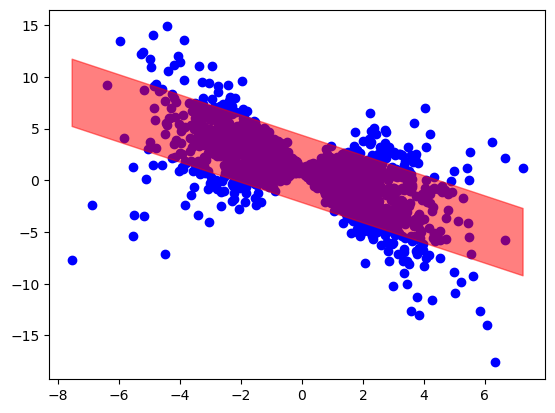

In [ ]:
q_cal = int(np.ceil((1-alpha)*(n_cal + 1)))
q = np.sort(scores.flatten())[q_cal - 1]


y_upper = Y_pred + q
y_lower = Y_pred - q

plt.scatter(X_test, Y_test, color="blue")

plt.fill_between(X_test[np.argsort(X_test)], y_lower[np.argsort(X_test)], y_upper[np.argsort(X_test)], color="red", alpha = 0.5)

In [88]:
def check_coverage(alpha, S, y, y_hat):
    n = len(S)
    q_cal = int(np.ceil((1-alpha)*(n+1)))
    if q_cal >= n+1:
        return [True] * len(y_hat)
    else:
        q_hat = np.sort(S)[q_cal - 1]
        return np.mean(np.abs(y-y_hat) <= q_hat)    
    
check_coverage(alpha, scores.flatten(), Y_test, Y_pred)

np.float64(0.901)

In [ ]:
from sklearn.linear_model import LinearRegression

def absolute_residual_score(x, y, model):
    return np.abs(y - model.predict(x))

def check_coverage(alpha, S, y, y_hat):
    n = len(S)
    q_cal = int(np.ceil((1-alpha)*(n+1)))
    if q_cal >= n+1:
        return [True] * len(y_hat)
    else:
        q_hat = np.sort(S)[q_cal - 1]
        return np.mean(np.abs(y-y_hat) <= q_hat)

def get_coverage(n_train, n_cal, n_test, alpha):
    n = n_train + n_cal + n_test

    a, b, sigma = 1, -1, 3
    D = generate_sample(n, a, b, sigma)

    D_train = D[:n_train,:]
    D_cal = D[n_train:(n_train + n_cal),:]
    D_test = D[(n_train + n_cal):n,:]

    X_train = D_train[:, 0]
    Y_train = D_train[:, 1]
    X_cal = D_cal[:, 0]
    Y_cal = D_cal[:, 1]
    X_test = D_test[:, 0]
    Y_test = D_test[:, 1]

    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

    scores = absolute_residual_score(X_cal.reshape(-1, 1), Y_cal.reshape(-1,1), model)

    #Y_pred = model.predict(X_test.reshape(-1, 1)).flatten()
    #return check_coverage(alpha, scores.flatten(), Y_test, Y_pred)

    return model, scores

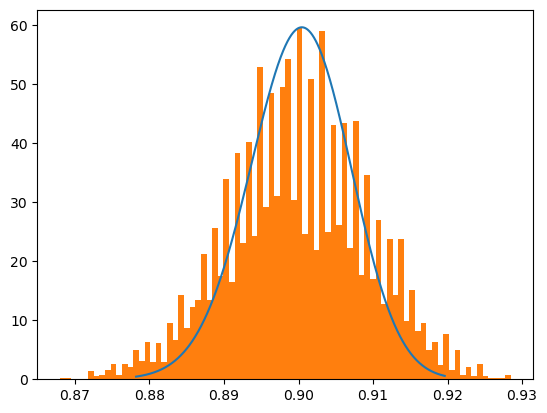

In [16]:
from sklearn.linear_model import LinearRegression
from scipy.stats import beta

def absolute_residual_score(x, y, model):
    return np.abs(y - model.predict(x))

def check_coverage(alpha, S, y, y_hat):
    n = len(S)
    q_cal = int(np.ceil((1-alpha)*(n+1)))
    if q_cal >= n+1:
        return [True] * len(y_hat)
    else:
        q_hat = np.sort(S)[q_cal - 1]
        return np.mean(np.abs(y-y_hat) <= q_hat)

n_train = 100
n_cal = 2000
n_test = 2000
n = n_train + n_cal + n_test
alpha = 0.1

a, b, sigma = 1, -1, 3

D_train = generate_sample(n_train, a, b, sigma)
X_train = D_train[:, 0]
Y_train = D_train[:, 1]

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

N = 5000
cov = np.zeros(N)

for i in range(N):
    D_cal = generate_sample(n_cal, a, b, sigma)
    X_cal = D_cal[:, 0]
    Y_cal = D_cal[:, 1]
    scores = absolute_residual_score(X_cal.reshape(-1, 1), Y_cal.reshape(-1,1), model)
    
    D_test = generate_sample(n_test, a, b, sigma)
    X_test = D_test[:, 0]
    Y_test = D_test[:, 1]
    Y_pred = model.predict(X_test.reshape(-1, 1)).flatten()
    cov[i] = check_coverage(alpha, scores.flatten(), Y_test, Y_pred)

a = np.ceil((1-alpha)*(n_cal+1))
b = n_cal + 1 - a
x = np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b), 1000)

plt.plot(x, beta.pdf(x, a, b))
plt.hist(cov, density=True, bins=80)
plt.show()

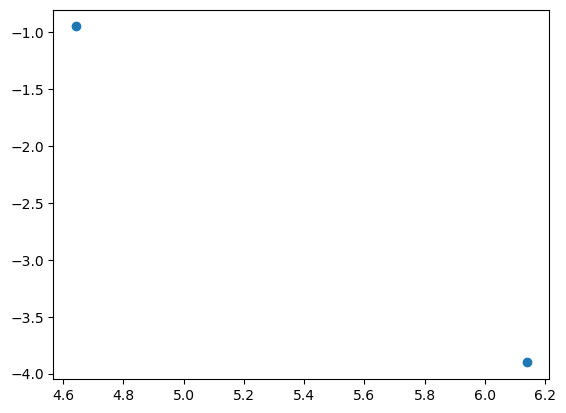

In [ ]:
def generate_data(n):
    x = np.random.uniform(-5, 5, n)
    err = np.zeros(n)
    for i in range(n):
        err[i] = np.random.gamma(2, 2*(1+np.abs(x[i])))
    y = -1 + x + err - 2*2*(1+np.abs(x))
    return np.vstack((x,y))

D = generate_data(200)
plt.scatter(D[:, 0], D[:, 1])